# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [183]:
import pandas as pd
import numpy as np

In [184]:
horse = pd.read_csv('horse_data.csv', header=None)
horse.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


In [185]:
# дадим названия столбцам согласно файлу "horse_data.names"
horse.columns = (
    ['surgery?','Age','Hospital_Number','rectal_temperature','pulse','respiratory_rate','temperature_of_extremities',
     'peripheral_pulse','mucous_membranes','capillary_refill_time','pain','peristalsis','abdominal_distension',
     'nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH','rectal_examination','abdomen','packed_cell_volume',
     'total_protein','abdominocentesis_appearance','abdomcentesis_total_protein','outcome','surgical_lesion?',
     'site_of_lesion','type_lesion','subtype_lesion','cp_data'])
horse.head(10)

,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion?,site_of_lesion,type_lesion,subtype_lesion,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
5,2,1,528355,?,?,?,2,1,3,1,...,?,?,?,?,1,2,0,0,0,2
6,1,1,526802,37.90,48,16,1,1,1,1,...,37.00,7.00,?,?,1,1,3124,0,0,2
7,1,1,529607,?,60,?,3,?,?,1,...,44.00,8.30,?,?,2,1,2208,0,0,2
8,2,1,530051,?,80,36,3,4,3,1,...,38.00,6.20,?,?,3,1,3205,0,0,2
9,2,9,5299629,38.30,90,?,1,?,1,1,...,40.00,6.20,1,2.20,1,2,0,0,0,1


In [186]:
# оставляем только интересные нам столбцы
cols = ['surgery?','Age','rectal_temperature','pulse','respiratory_rate','temperature_of_extremities','pain','outcome']
horse = horse[cols]
horse.head(10)

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,?,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,?,?,2
5,2,1,?,?,?,2,2,1
6,1,1,37.90,48,16,1,3,1
7,1,1,?,60,?,3,?,2
8,2,1,?,80,36,3,4,3
9,2,9,38.30,90,?,1,5,1


### Задание 2. Работа с выбросами

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Видим что пустые поля заполнены знаками вопроса (?), заменим их на None
(также можно было при чтении указать na_values='?', но я посчитал что данные мы видим уже после чтения)

In [187]:
horse.replace(to_replace='?', value=np.nan, inplace=True)
horse.head(10)

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2
5,2,1,NaN,NaN,NaN,2,2,1
6,1,1,37.90,48,16,1,3,1
7,1,1,NaN,60,NaN,3,NaN,2
8,2,1,NaN,80,36,3,4,3
9,2,9,38.30,90,NaN,1,5,1


In [188]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   surgery?                    299 non-null    object
 1   Age                         300 non-null    int64 
 2   rectal_temperature          240 non-null    object
 3   pulse                       276 non-null    object
 4   respiratory_rate            242 non-null    object
 5   temperature_of_extremities  244 non-null    object
 6   pain                        245 non-null    object
 7   outcome                     299 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [189]:
(horse.isna().mean() * 100).round(2)

surgery?                       0.33
Age                            0.00
rectal_temperature            20.00
pulse                          8.00
respiratory_rate              19.33
temperature_of_extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

Кроме столбца с возрастом, все столбцы имеют тип object (видимо из-за изначальных пропусков в виде знака '?'. Преобразуем их в типы данных, согласно описанию. Отмечу, что некоторые "числовые" столбцы - не числа, а категории, например 'surgery?' - была операция или нет, или (неочевидно из названия) Age - это не возраст в годах, а 1 (взрослая лошадь) или 2 (молодая), т.е. тоже категория, итд согласно описания данных 

In [190]:
# заменим заначения NaN на -999 и после преобразования типов обратно, 
#без этого будем иметь ошибку "cannot convert float NaN to integer"
horse = horse.fillna(-999)
horse = horse.astype({'surgery?':'category', 'Age':'category', 'rectal_temperature':'float', 'pulse':'int16',
                'respiratory_rate':'int8', 'temperature_of_extremities':'category', 'pain':'category', 'outcome':'category'})
horse = horse.replace(-999, np.nan)
horse.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66.0,28,3,5,2
1,1,1,39.2,88.0,20,NaN,3,3
2,2,1,38.3,40.0,24,1,3,1
3,1,9,39.1,164.0,84,4,2,2
4,2,1,37.3,104.0,35,NaN,NaN,2


In [191]:
# не очень понимаю почему пульс не преобразовался в int, видимо в данных где-то есть дробное значнеие
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery?                    299 non-null    category
 1   Age                         300 non-null    category
 2   rectal_temperature          240 non-null    float64 
 3   pulse                       276 non-null    float64 
 4   respiratory_rate            300 non-null    int8    
 5   temperature_of_extremities  244 non-null    category
 6   pain                        245 non-null    category
 7   outcome                     299 non-null    category
dtypes: category(5), float64(2), int8(1)
memory usage: 7.2 KB


In [192]:
horse.describe()

,rectal_temperature,pulse,respiratory_rate
count,240.000000,276.000000,300.000000
mean,38.167917,71.913043,29.370000
std,0.732289,28.630557,15.983262
min,35.400000,30.000000,8.000000
25%,37.800000,48.000000,20.000000
50%,38.200000,64.000000,25.000000
75%,38.500000,88.000000,34.250000
max,40.800000,184.000000,96.000000


In [193]:
horse.respiratory_rate.sort_values(ascending=False)

39     96
106    96
269    90
186    90
244    88
       ..
209    10
89     10
140     9
203     9
190     8
Name: respiratory_rate, Length: 300, dtype: int8

In [194]:
horse.pulse.sort_values(ascending=False)

255    184.0
3      164.0
55     160.0
275    150.0
41     150.0
       ...  
204      NaN
207      NaN
216      NaN
227      NaN
288      NaN
Name: pulse, Length: 300, dtype: float64

Посчитаем минимумы и максимумы, значения за пределами который будем счетать выбросами, по формулам:  
min = Q1 - (1.5 * IQR)  
max = Q3 + (1.5 * IQR)  
где IQR = Q3 - Q1 - межквартильный размах  
ниже t_qscope, p_qscope, r_qscope - межквантильные размахи для столбцов температуры, пульса и частоты дыхания соответственно,  
max и min с преффиксами - соотв. минимумы и максимумы за кторорыми идут выбросы.

In [224]:
t_qscope = (horse['rectal_temperature'].quantile(0.75) - horse['rectal_temperature'].quantile(0.25)).round(2)
p_qscope = (horse['pulse'].quantile(0.75) - horse['pulse'].quantile(0.25)).round(2)
r_qscope = (horse['respiratory_rate'].quantile(0.75) - horse['respiratory_rate'].quantile(0.25)).round(2)
t_max = horse['rectal_temperature'].quantile(0.75) + t_qscope
t_min = horse['rectal_temperature'].quantile(0.25) - t_qscope
p_max = horse['pulse'].quantile(0.75) + t_qscope
p_min = horse['pulse'].quantile(0.25) - t_qscope
r_max = horse['respiratory_rate'].quantile(0.75) + t_qscope
r_min = horse['respiratory_rate'].quantile(0.25) - t_qscope
print(t_qscope, t_max, t_min, p_qscope, p_max, p_min, r_qscope, r_max, r_min)

0.6 39.1 37.3 40.0 88.6 47.4 14.25 34.85 19.4


Для температуры выбросами можно считать значения вне диапазона 37.3 - 39.1, для пульса вне 47.4 - 88.6,  
для частоты дыхания вне 19.4 - 34.85

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

### Анализ столбцов

#### Столбец surgery?
Была ли операция, в этом столбце только один пропуск

In [195]:
horse.loc[pd.isnull(horse['surgery?'])]

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
132,NaN,1,38.0,48.0,20,3,4,NaN


можно было бы заполнить это Модой, но есть доп. показатель - столбец pain - боль, от 1 до 5ти и мы знаем что чем сильнее боль, тем вероятнее хирурическое вмешательство, т.е. при значении pain = 4 для этой строки в столбец surgery? вместо NaN поставим 1 - операция была (собственно мода тоже 1)

In [196]:
horse['surgery?'].value_counts()

1    180
2    119
Name: surgery?, dtype: int64

In [197]:
horse['surgery?'].fillna('1', inplace=True)

In [198]:
horse['surgery?'].value_counts()

1    181
2    119
Name: surgery?, dtype: int64

#### Столбец Age
По описанию возможные значнеия 1 - Взрослая лошадь, или 2 - молодая (< 6 месяцев)

In [199]:
horse['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

Пропусков нет, но мы видим что значения 1 и 9, предположу что это ошибка и вместо 9 должно быть значение 2 - молодая лошадь, заменим в этом столбце значение 9 на 2

In [200]:
horse.Age.replace(9, 2, inplace=True)
horse['Age'].value_counts()

1    276
2     24
Name: Age, dtype: int64

#### Столбцы rectal_temperature, pulse и respiratory_rate
Для температуры заполним пропуски средним арифметическим, а для пульса и частоты дыхания возьмем медиану, т.к. распределение не равномерное (в самом конце есть визуализация) и есть выбросы, хоть измерения скорее всего реальные.

In [201]:
horse.rectal_temperature.fillna(round(horse.rectal_temperature.mean(),1), inplace=True)
horse.pulse.fillna(round(horse.pulse.median()), inplace=True)
horse.respiratory_rate.fillna(round(horse.respiratory_rate.median()), inplace=True)
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery?                    300 non-null    category
 1   Age                         300 non-null    category
 2   rectal_temperature          300 non-null    float64 
 3   pulse                       300 non-null    float64 
 4   respiratory_rate            300 non-null    int8    
 5   temperature_of_extremities  244 non-null    category
 6   pain                        245 non-null    category
 7   outcome                     299 non-null    category
dtypes: category(5), float64(2), int8(1)
memory usage: 7.2 KB


#### Столбец temperature_of_extremities
Температура конечностей - коррелирует с температурой тела (в случае горячих)

In [202]:
horse.temperature_of_extremities.value_counts()

3    109
1     78
2     30
4     27
Name: temperature_of_extremities, dtype: int64

Видим что наиболее часто встречаются 1 -нормальная и 3 - прохладный, заполним пропуски Модой, т.е. значнеием 3.

In [203]:
horse.temperature_of_extremities.fillna('3', inplace=True)

In [204]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery?                    300 non-null    category
 1   Age                         300 non-null    category
 2   rectal_temperature          300 non-null    float64 
 3   pulse                       300 non-null    float64 
 4   respiratory_rate            300 non-null    int8    
 5   temperature_of_extremities  300 non-null    category
 6   pain                        245 non-null    category
 7   outcome                     299 non-null    category
dtypes: category(5), float64(2), int8(1)
memory usage: 7.2 KB


#### Столбец pain
Боль - тоже категориальный столбец, субъективное суждение об уровне боли лошади
- возможные значения:  
1 = нет боли  
2 = депрессия  
3 = прерывистая легкая боль  
4 = прерывистая сильная боль  
5 = непрерывная сильная боль

В общем, чем больнее, тем больше вероятность того, что это потребуется
хирургия

In [205]:
horse.pain.value_counts()

3    67
2    59
5    42
4    39
1    38
Name: pain, dtype: int64

Значения идут как бы от меньшего к большему, от меньше боли к большей, поэтому запоним пустоты неким "средним" значнеием, к тому же оно и является наиболее часто встречающимся (модой) 

In [206]:
horse.pain.fillna('3', inplace=True)

#### Столбец outcome
Результат лечения, тут только один пропуск, заполним его Модой

In [207]:
horse.outcome.value_counts()

1    178
2     77
3     44
Name: outcome, dtype: int64

In [208]:
horse.outcome.fillna('1', inplace=True)

## Итоговый датафрейм без пропусков

In [209]:
horse.head(10)

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66.0,28,3,5,2
1,1,1,39.2,88.0,20,3,3,3
2,2,1,38.3,40.0,24,1,3,1
3,1,2,39.1,164.0,84,4,2,2
4,2,1,37.3,104.0,35,3,3,2
5,2,1,38.2,64.0,25,2,2,1
6,1,1,37.9,48.0,16,1,3,1
7,1,1,38.2,60.0,25,3,3,2
8,2,1,38.2,80.0,36,3,4,3
9,2,2,38.3,90.0,25,1,5,1


In [210]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   surgery?                    300 non-null    category
 1   Age                         300 non-null    category
 2   rectal_temperature          300 non-null    float64 
 3   pulse                       300 non-null    float64 
 4   respiratory_rate            300 non-null    int8    
 5   temperature_of_extremities  300 non-null    category
 6   pain                        300 non-null    category
 7   outcome                     300 non-null    category
dtypes: category(5), float64(2), int8(1)
memory usage: 7.2 KB


In [211]:
horse.describe()

,rectal_temperature,pulse,respiratory_rate
count,300.000000,300.000000,300.000000
mean,38.174333,71.280000,29.370000
std,0.654831,27.541545,15.983262
min,35.400000,30.000000,8.000000
25%,37.900000,48.000000,20.000000
50%,38.200000,64.000000,25.000000
75%,38.500000,88.000000,34.250000
max,40.800000,184.000000,96.000000


## Чуть визуализации

In [178]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

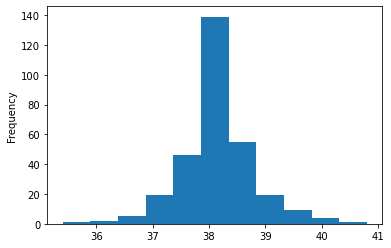

In [179]:
horse['rectal_temperature'].plot(kind='hist', bins=11)

<AxesSubplot:ylabel='Frequency'>

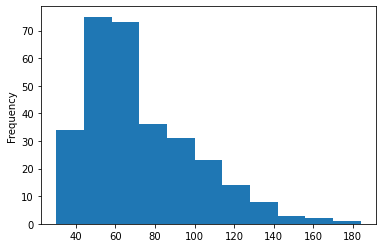

In [180]:
horse['pulse'].plot(kind='hist', bins=11)

<AxesSubplot:ylabel='Frequency'>

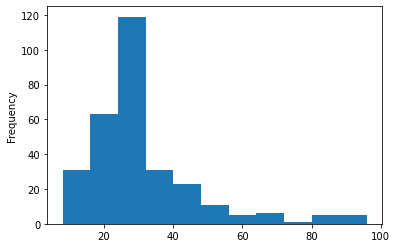

In [181]:
horse['respiratory_rate'].plot(kind='hist', bins=11)

<AxesSubplot:>

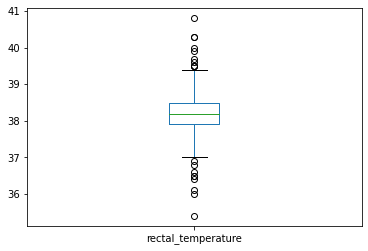

In [213]:
horse[['rectal_temperature']].plot(kind='box')

<AxesSubplot:>

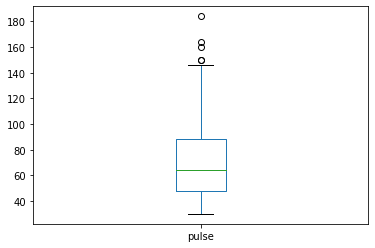

In [214]:
horse[['pulse']].plot(kind='box')

<AxesSubplot:>

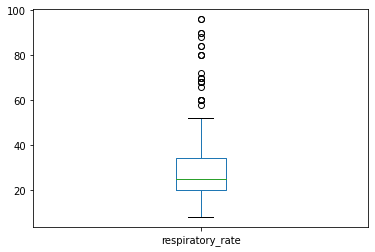

In [215]:
horse[['respiratory_rate']].plot(kind='box')